In [ ]:
from joblib import Parallel, delayed
import os

# Définir le nombre de cœurs disponibles
n_jobs = os.cpu_count()  # ou directement spécifier 20

print(f"Utilisation de {n_jobs} cœurs pour la parallélisation des tâches.")


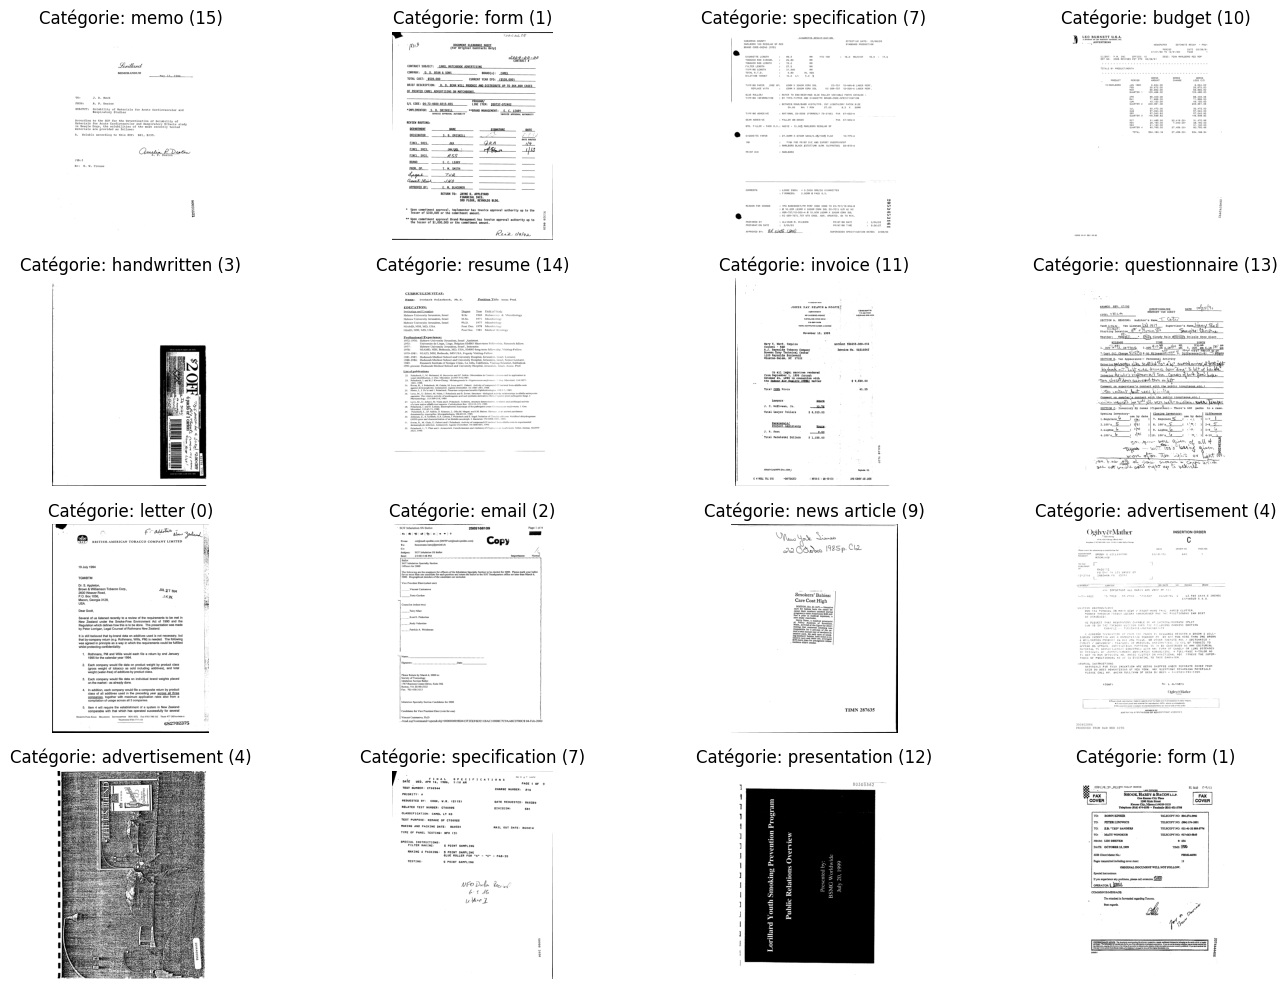

In [70]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Définir le chemin vers les labels et les images
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Lire les chemins d'images et les catégories
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 16  # Nombre d'images à visualiser
samples = [line.strip().split() for line in lines[:sample_size]]

# Charger et afficher les images avec leurs étiquettes
plt.figure(figsize=(15, 10))
for i, (relative_image_path, category) in enumerate(samples):
    image_path = os.path.join(image_base_path, relative_image_path)
    image = mpimg.imread(image_path)
    
    # Récupérer le nom de la catégorie
    category_name = categories_dict.get(category, "Unknown")
    
    plt.subplot(4, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Catégorie: {category_name} ({category})")
    plt.axis('off')

plt.tight_layout()
plt.show()


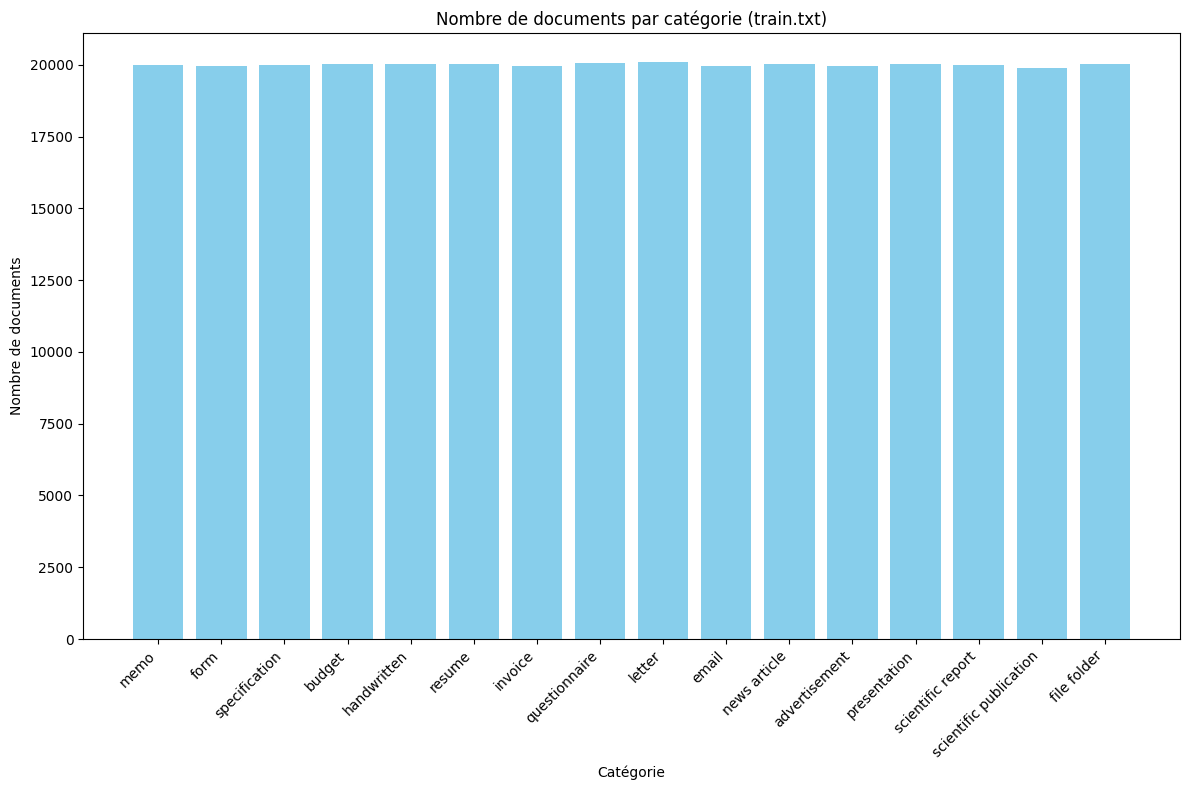

In [71]:
from collections import Counter

# Extraire les catégories
categories = [line.strip().split()[1] for line in lines]

# Compter le nombre de documents par catégorie
category_counts = Counter(categories)

# Remplacer les clés (numéros de catégories) par leurs noms correspondants
category_counts_named = {categories_dict[key]: value for key, value in category_counts.items()}

# Créer un graphique en barres
plt.figure(figsize=(12, 8))
plt.bar(category_counts_named.keys(), category_counts_named.values(), color='skyblue')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de documents')
plt.title('Nombre de documents par catégorie (train.txt)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


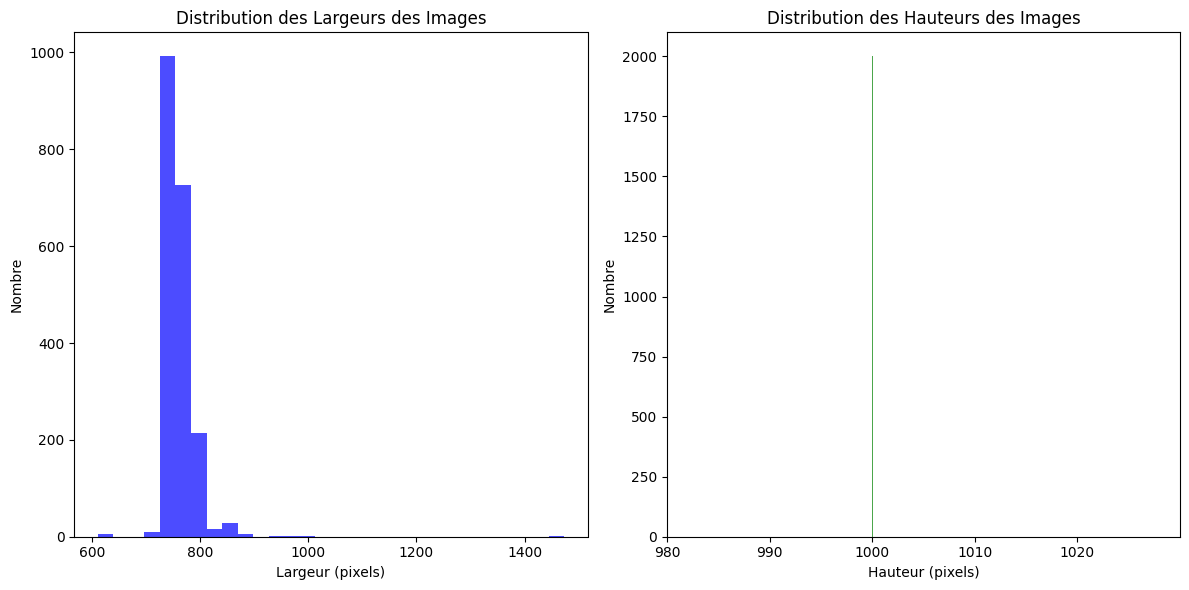

In [72]:
from PIL import Image

widths = []
heights = []

# Sélectionner un échantillon de données
sample_size = 2000  # Nombre d'images à visualiser
samples = [line.strip().split() for line in lines[:sample_size]]

for relative_image_path, _ in samples:  # samples contient les chemins vers les images
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        widths.append(img.width)
        heights.append(img.height)
        # Afficher les dimensions pour vérifier s'il y a des anomalies
        # print(f"Image: {relative_image_path} - Width: {img.width}, Height: {img.height}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution des Largeurs des Images')
plt.xlabel('Largeur (pixels)')
plt.ylabel('Nombre')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=10, color='green', alpha=0.7)
plt.title('Distribution des Hauteurs des Images')
plt.xlim(980, 1030)
plt.xticks(range(980, 1021, 10))
plt.xlabel('Hauteur (pixels)')
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()


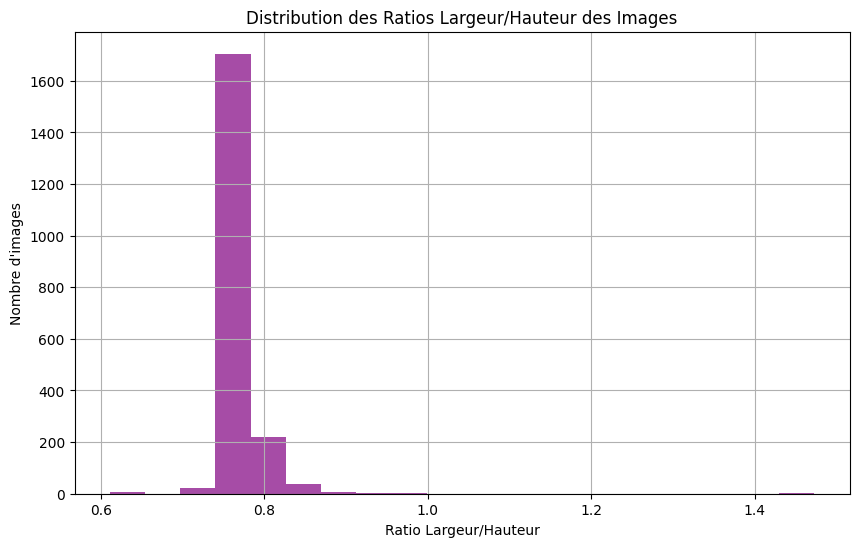

In [73]:
# Initialiser les listes pour les largeurs, hauteurs et ratios
widths = []
heights = []
ratios = []

# Parcourir les images et calculer les ratios largeur/hauteur
for relative_image_path, _ in samples:  # samples contient les chemins vers les images
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        width = img.width
        height = img.height
        ratio = width / height

        widths.append(width)
        heights.append(height)
        ratios.append(ratio)

# Visualiser la distribution des ratios largeur/hauteur
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=20, color='purple', alpha=0.7)
plt.title('Distribution des Ratios Largeur/Hauteur des Images')
plt.xlabel('Ratio Largeur/Hauteur')
plt.ylabel('Nombre d\'images')
plt.grid(True)
plt.show()

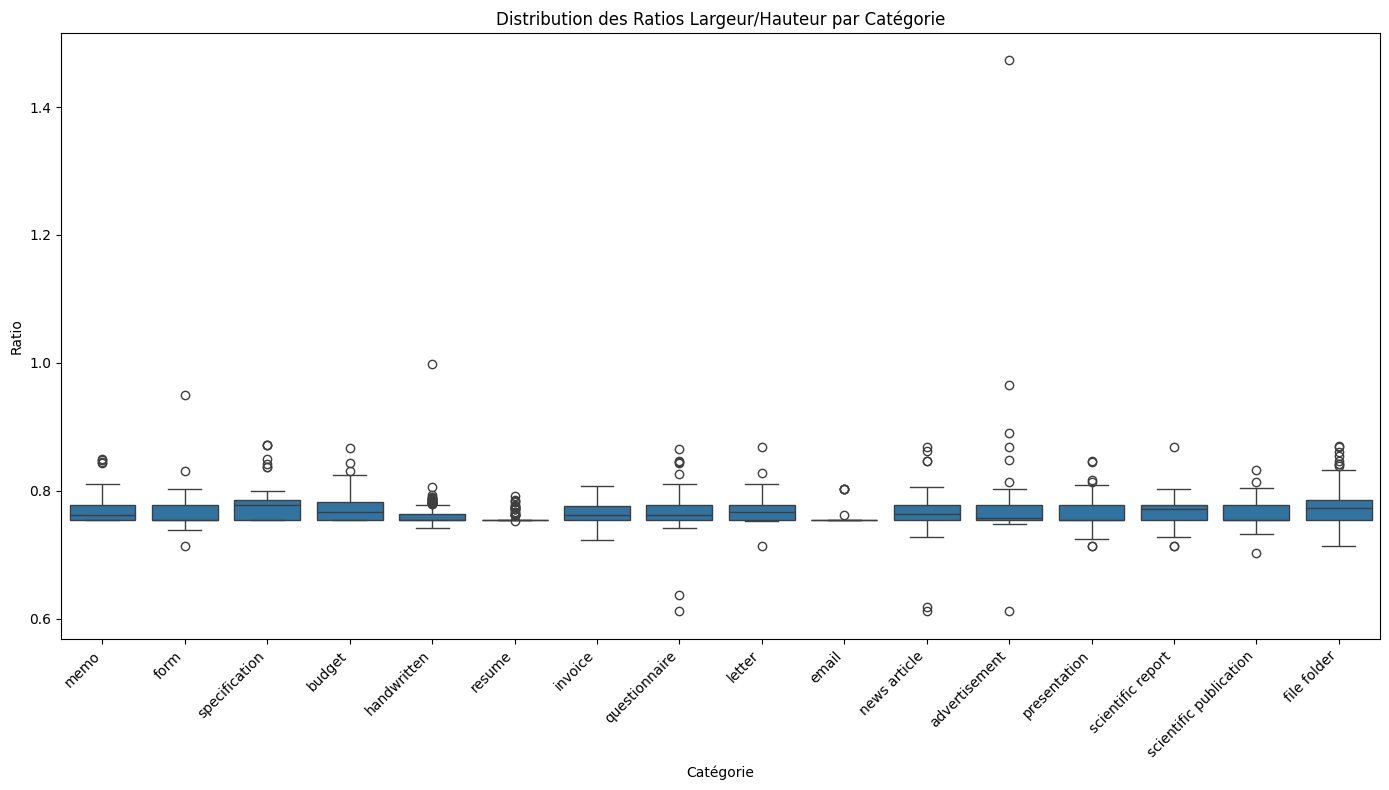

In [74]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialiser les listes pour les données
ratios = []
categories_list = []

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Parcourir les images et calculer les ratios largeur/hauteur pour chaque catégorie
for relative_image_path, category in samples:  # samples contient les chemins vers les images et leurs catégories
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        width = img.width
        height = img.height
        ratio = width / height

        ratios.append(ratio)
        categories_list.append(categories_dict[category])

# Créer un DataFrame pour la visualisation
df = pd.DataFrame({
    'Ratio': ratios,
    'Catégorie': categories_list
})

# Visualiser avec des box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='Catégorie', y='Ratio', data=df)
plt.title('Distribution des Ratios Largeur/Hauteur par Catégorie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Base path pour les images
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Lire les chemins d'images et les catégories
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 100  # Augmenter la taille de l'échantillon pour mieux visualiser la distribution
samples = [line.strip().split() for line in lines[:sample_size]]

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Calculer la luminance moyenne pour chaque image
luminance_means = []

for relative_image_path, category in samples:
    image_path = os.path.join(image_base_path, relative_image_path)
    image = Image.open(image_path)
    gray_array = np.array(image)
    
    # Calculer la luminance moyenne
    mean_luminance = np.mean(gray_array)
    luminance_means.append((relative_image_path, mean_luminance, categories_dict[category]))

# Extraire les luminances moyennes pour le plot
luminance_values = [mean for _, mean, _ in luminance_means]


# Définir un seuil pour identifier les documents à fond foncé
seuil = 200  # Ce seuil peut être ajusté en fonction du plot

# Plot de la distribution des luminances moyennes
plt.figure(figsize=(10, 6))
plt.hist(luminance_values, bins=30, color='gray', alpha=0.7)
plt.axvline(x=seuil, color='red', linestyle='--', label=f"Seuil = {seuil}")
plt.title('Distribution des Luminances Moyennes')
plt.xlabel('Luminance Moyenne')
plt.ylabel('Nombre de Documents')
plt.grid(True)
plt.legend()
plt.show()


# Identifier et afficher les documents avec une luminance moyenne inférieure au seuil
dark_documents = [doc for doc in luminance_means if doc[1] < seuil]

print(f"Documents avec une luminance moyenne inférieure à : {seuil}")
for doc in dark_documents:
    print(f"Image: {doc[0]}, Luminance Moyenne: {doc[1]:.2f}, Catégorie: {doc[2]}")

# Visualiser les documents à fond foncé
plt.figure(figsize=(12, 8))
for i, (image_path, mean_luminance, category) in enumerate(dark_documents):
    image_full_path = os.path.join(image_base_path, image_path)
    image = Image.open(image_full_path)
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nLuminance: {mean_luminance:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Image: imagesm/m/r/d/mrd16e00/2044400348.tif, Luminance Moyenne: 131.43, Variance Locale Moyenne: 112.68, Catégorie: advertisement


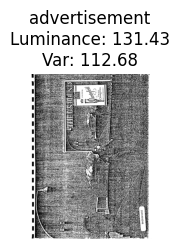

In [75]:
from scipy.ndimage import generic_filter
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def local_variance(arr):
    return arr.var()

# Base path pour les images
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Lire les chemins d'images et les catégories
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 16
samples = [line.strip().split() for line in lines[:sample_size]]

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Calculer la luminance moyenne et la variance locale
results = []

for relative_image_path, category in samples:
    image_path = os.path.join(image_base_path, relative_image_path)
    image = Image.open(image_path)
    gray_array = np.array(image)
    
    # Luminance moyenne
    mean_luminance = np.mean(gray_array)
    
    # Variance locale
    local_var = generic_filter(gray_array, local_variance, size=3)
    mean_local_var = np.mean(local_var)
    
    results.append((relative_image_path, mean_luminance, mean_local_var, categories_dict[category]))

# Définir un seuil pour la variance locale pour identifier les images granuleuses
variance_threshold = 50

# Filtrer les images granuleuses
granular_documents = [doc for doc in results if doc[2] > variance_threshold]

# Afficher les résultats
for doc in granular_documents:
    print(f"Image: {doc[0]}, Luminance Moyenne: {doc[1]:.2f}, Variance Locale Moyenne: {doc[2]:.2f}, Catégorie: {doc[3]}")

# Visualiser les documents granuleux
plt.figure(figsize=(12, 8))
for i, (image_path, mean_luminance, mean_local_var, category) in enumerate(granular_documents):
    image_full_path = os.path.join(image_base_path, image_path)
    image = Image.open(image_full_path)
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nLuminance: {mean_luminance:.2f}\nVar: {mean_local_var:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


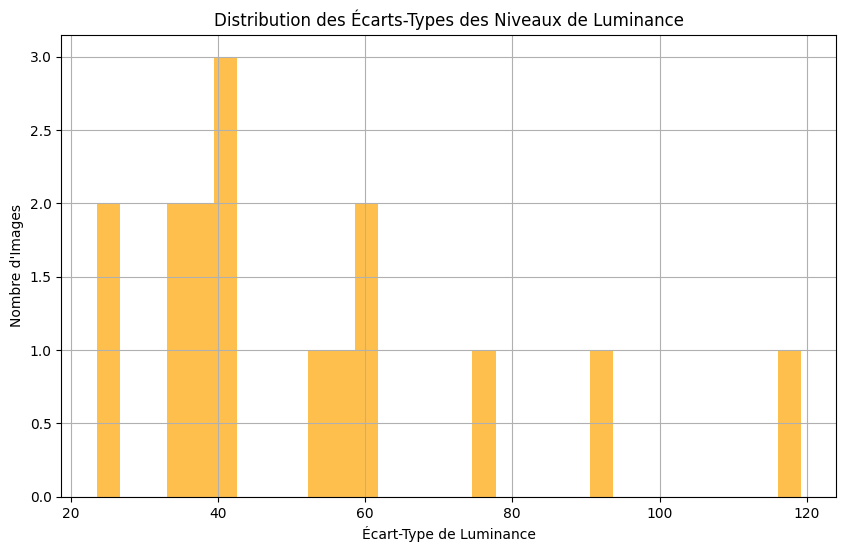

Images avec un faible contraste (écart-type < 10):

Images avec un haut contraste (écart-type > 110):
Image: imagesp/p/i/u/piu62d00/80303362_3392.tif, Écart-Type: 119.23, Catégorie: presentation


<Figure size 1200x600 with 0 Axes>

<function matplotlib.pyplot.suptitle(t: 'str', **kwargs) -> 'Text'>

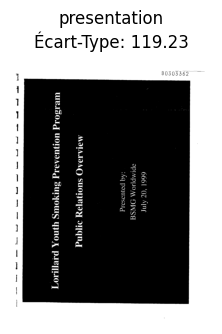

In [76]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

# Initialiser une liste pour stocker les résultats
luminance_stds = []

# Fonction pour calculer l'écart-type des niveaux de luminance
def calculate_luminance_std(image_path):
    image = Image.open(image_path).convert('L')
    gray_array = np.array(image)
    luminance_std = np.std(gray_array)
    return luminance_std

# Parcourir les images et calculer l'écart-type
for relative_image_path, category in samples:
    image_path = os.path.join(image_base_path, relative_image_path)
    luminance_std = calculate_luminance_std(image_path)
    luminance_stds.append((relative_image_path, luminance_std, categories_dict[category]))

# Extraire les valeurs d'écart-type pour le plot
luminance_values = [std for _, std, _ in luminance_stds]

# Plot de la distribution des écarts-types de luminance
plt.figure(figsize=(10, 6))
plt.hist(luminance_values, bins=30, color='orange', alpha=0.7)
plt.title('Distribution des Écarts-Types des Niveaux de Luminance')
plt.xlabel('Écart-Type de Luminance')
plt.ylabel('Nombre d\'Images')
plt.grid(True)
plt.show()

# Optionnel : Afficher les images avec un écart-type faible ou élevé (indicateur de contraste faible ou élevé)
low_contrast_images = [doc for doc in luminance_stds if doc[1] < 10]  # seuil arbitraire pour faible contraste
high_contrast_images = [doc for doc in luminance_stds if doc[1] > 110]  # seuil arbitraire pour haut contraste

print(f"Images avec un faible contraste (écart-type < 10):")
for doc in low_contrast_images[:4]:  # Limiter à 4 images
    print(f"Image: {doc[0]}, Écart-Type: {doc[1]:.2f}, Catégorie: {doc[2]}")

print(f"\nImages avec un haut contraste (écart-type > 110):")
for doc in high_contrast_images[:4]:  # Limiter à 4 images
    print(f"Image: {doc[0]}, Écart-Type: {doc[1]:.2f}, Catégorie: {doc[2]}")

# Plot des images à faible contraste
plt.figure(figsize=(12, 6))
for i, (relative_image_path, luminance_std, category) in enumerate(low_contrast_images[:4]):
    image_path = os.path.join(image_base_path, relative_image_path)
    image = Image.open(image_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nÉcart-Type: {luminance_std:.2f}')
    plt.axis('off')

plt.suptitle('Images avec Faible Contraste')
plt.tight_layout()
plt.show()

# Plot des images à haut contraste
plt.figure(figsize=(12, 6))
for i, (relative_image_path, luminance_std, category) in enumerate(high_contrast_images[:4]):
    image_path = os.path.join(image_base_path, relative_image_path)
    image = Image.open(image_path)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nÉcart-Type: {luminance_std:.2f}')
    plt.axis('off')

plt.suptitle


/home/kory/DST_RVL-CDIP/env_RVL_CDIP/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


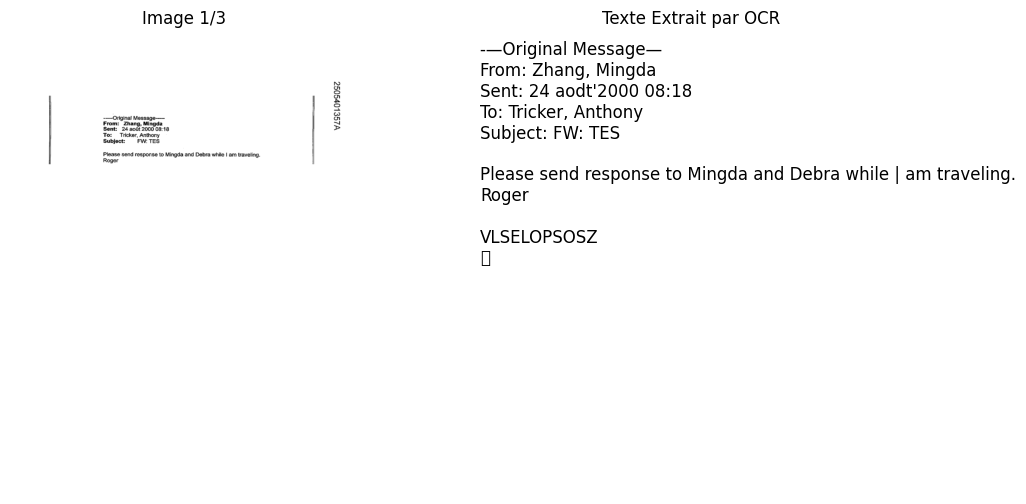


--- Résultats OCR pour l'image 1/3 ---
Chemin : /mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images/imagesw/w/m/z/wmz29c00/2505401357a.tif
Texte extrait :
-—Original Message—
From: Zhang, Mingda
Sent: 24 aodt'2000 08:18
To: Tricker, Anthony
Subject: FW: TES

Please send response to Mingda and Debra while | am traveling.
Roger

VLSELOPSOSZ




/home/kory/DST_RVL-CDIP/env_RVL_CDIP/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


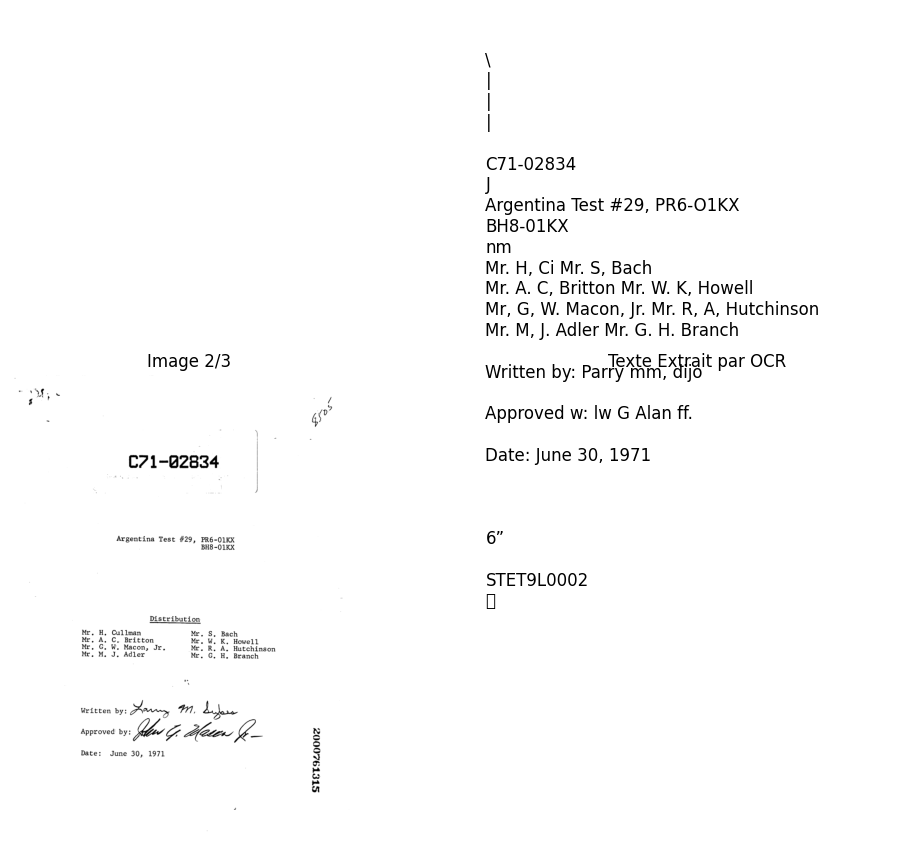


--- Résultats OCR pour l'image 2/3 ---
Chemin : /mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images/imagesw/w/t/w/wtw48e00/2000761315_2000761317.tif
Texte extrait :
 

\
|
|
|

C71-02834
J
Argentina Test #29, PR6-O1KX
BH8-01KX
nm
Mr. H, Ci Mr. S, Bach
Mr. A. C, Britton Mr. W. K, Howell
Mr, G, W. Macon, Jr. Mr. R, A, Hutchinson
Mr. M, J. Adler Mr. G. H. Branch

Written by: Parry mm, dijo

Approved w: lw G Alan ff.

Date: June 30, 1971

 

6”

STET9L0002




/home/kory/DST_RVL-CDIP/env_RVL_CDIP/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12 () missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


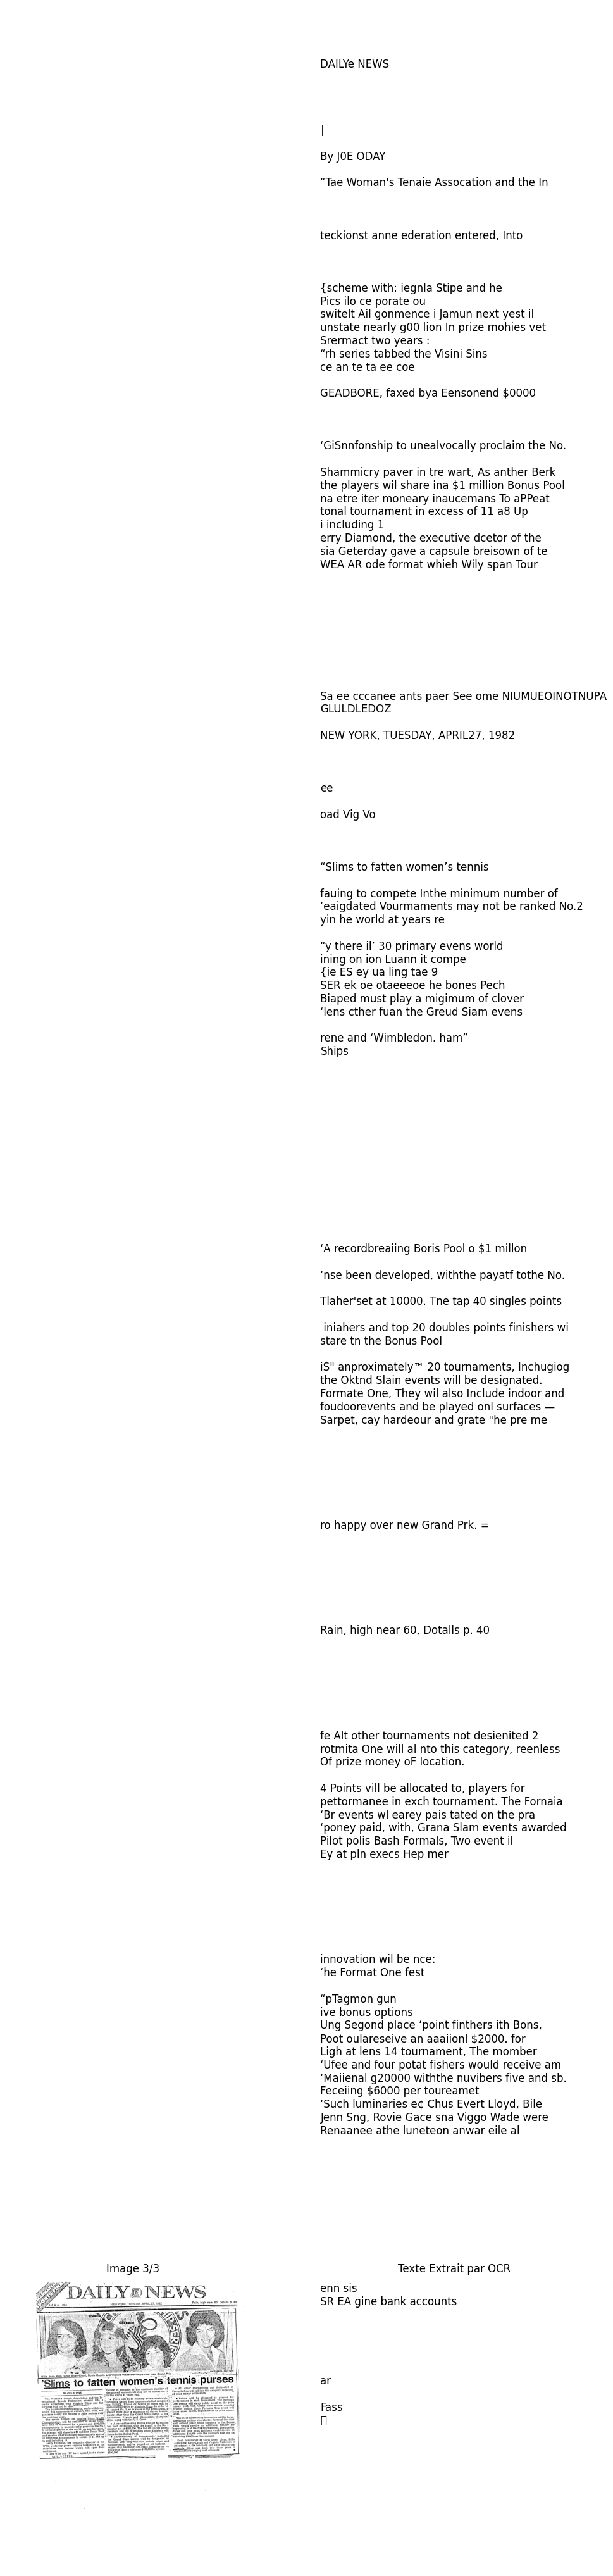


--- Résultats OCR pour l'image 3/3 ---
Chemin : /mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images/imagesw/w/w/y/wwy95e00/2043747175.tif
Texte extrait :
 

 

DAILYe NEWS

       
 

|

By J0E ODAY

“Tae Woman's Tenaie Assocation and the In

 

teckionst anne ederation entered, Into

 

{scheme with: iegnla Stipe and he
Pics ilo ce porate ou
switelt Ail gonmence i Jamun next yest il
unstate nearly g00 lion In prize mohies vet
Srermact two years :
“rh series tabbed the Visini Sins
ce an te ta ee coe

GEADBORE, faxed bya Eensonend $0000

 

‘GiSnnfonship to unealvocally proclaim the No.

Shammicry paver in tre wart, As anther Berk
the players wil share ina $1 million Bonus Pool
na etre iter moneary inaucemans To aPPeat
tonal tournament in excess of 11 a8 Up
i including 1
erry Diamond, the executive dcetor of the
sia Geterday gave a capsule breisown of te
WEA AR ode format whieh Wily span Tour

 

 

   

 

Sa ee cccanee ants paer See ome 

In [77]:
import os
from PIL import Image
import pytesseract
import random
import glob

# Base path pour les images
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Sélectionner un nombre limité de sous-dossiers aléatoires
subdirs = [os.path.join(image_base_path, o) for o in os.listdir(image_base_path) if os.path.isdir(os.path.join(image_base_path,o))]
selected_subdirs = random.sample(subdirs, 10)  # Sélectionne 10 sous-dossiers aléatoires

# Récupérer un échantillon d'images des sous-dossiers sélectionnés
sample_size = 3  # Taille de l'échantillon total
sample_images = []

for subdir in selected_subdirs:
    # Utiliser glob pour récupérer les fichiers images dans le sous-dossier
    images = glob.glob(os.path.join(subdir, '**/*.tif'), recursive=True)
    
    if len(images) > 0:
        # Sélectionner un échantillon aléatoire parmi les images de ce sous-dossier
        sample_images.extend(random.sample(images, min(sample_size, len(images))))
    
    # Stopper une fois que le nombre total d'images échantillonnées est atteint
    if len(sample_images) >= sample_size:
        break

# Limiter le nombre total d'images échantillonnées
sample_images = sample_images[:sample_size]

# Appliquer l'OCR sur chaque image de l'échantillon
for i, image_path in enumerate(sample_images):
    image = Image.open(image_path)
    
    # Effectuer l'OCR sur l'image
    text = pytesseract.image_to_string(image)
    
    # Afficher l'image et le texte extrait
    plt.figure(figsize=(12, 6))
    
    # Afficher l'image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image {i+1}/{sample_size}")
    plt.axis('off')
    
    # Afficher le texte extrait
    plt.subplot(1, 2, 2)
    plt.text(0, 0.5, text, fontsize=12)
    plt.title(f"Texte Extrait par OCR")
    plt.axis('off')
    
    plt.show()

    # Afficher les résultats dans la console
    print(f"\n--- Résultats OCR pour l'image {i+1}/{sample_size} ---")
    print(f"Chemin : {image_path}")
    print(f"Texte extrait :\n{text}\n")